In [1]:
import re
import os
import boto3
import configparser

import numpy as np
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
config = configparser.ConfigParser()
config.read_file(open('awskey.cfg'))
CAPSTONE_AWS_ACCESS_KEY_ID = config.get('capstone', 'AWS_ACCESS_KEY_ID')
CAPSTONE_AWS_SECRET_ACCESS_KEY = config.get('capstone', 'AWS_SECRET_ACCESS_KEY')

In [3]:
s3_creds = {'region_name':"us-west-2",
            'aws_access_key_id': CAPSTONE_AWS_ACCESS_KEY_ID,
            'aws_secret_access_key': CAPSTONE_AWS_SECRET_ACCESS_KEY}
                          
client = boto3.client('s3', **s3_creds)
resource = boto3.resource('s3', **s3_creds)
bucket = resource.Bucket('us-immigration')

#### Immigration Data
-------------------------------------------

In [ ]:
# Read in the data here
!ls ../../data/18-83510-I94-Data-2016

In [ ]:
# https://github.com/saurfang/spark-sas7bdat
from pyspark.sql import SparkSession
spark = SparkSession.builder.\
config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11")\
.enableHiveSupport().getOrCreate()

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_apr16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_aug16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_aug16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_dec16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_dec16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_feb16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_feb16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_jan16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_jan16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_jul16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_jul16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_jun16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_jun16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_mar16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_mar16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_may16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_may16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_nov16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_nov16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_oct16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_oct16/imm_data.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.format("com.github.saurfang.sas.spark").load("../../data/18-83510-I94-Data-2016/i94_sep16_sub.sas7bdat", forceLowercaseNames=True, inferLong=True)
df_spark.write.parquet("immigration/i94_sep16/imm_data.parquet",mode='overwrite',compression='snappy')

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,DoubleType,IntegerType,TimestampType,DateType
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as funcToInt

immigrationSchema = StructType([        
        StructField('cicid', DoubleType()),
        StructField('i94yr', DoubleType()),
        StructField('i94mon', DoubleType()),
        StructField('i94cit', DoubleType()),
        StructField('i94res', DoubleType()),
        StructField('i94port',StringType()),
        StructField('arrdate',DoubleType()),
        StructField('i94mode', DoubleType()),
        StructField('i94addr', StringType()),        
        StructField('depdate',DoubleType()),
        StructField('i94bir', DoubleType()),
        StructField('i94visa', DoubleType()),
        StructField('count', DoubleType()),
        StructField('dtadfile', StringType()),
        StructField('visapost', StringType()), 
        StructField('occup', StringType()),
        StructField('entdepa', StringType()), 
        StructField('entdepd', StringType()), 
        StructField('entdepu', StringType()), 
        StructField('matflag', StringType()), 
        StructField('biryear', DoubleType()),
        StructField('dtaddto', StringType()), 
        StructField('gender', StringType()), 
        StructField('insnum', StringType()),   
        StructField('airline', StringType()), 
        StructField('admnum', DoubleType()), 
        StructField('fltno', StringType()), 
        StructField('visatype',StringType())
    ])

spark = SparkSession\
        .builder\
        .config("spark.jars.packages","org.apache.hadoop:hadoop-aws:2.7.0")\
        .enableHiveSupport()\
        .getOrCreate()

sc=spark.sparkContext
hadoop_confg=sc._jsc.hadoopConfiguration()
hadoop_confg.set("fs.s3a.impl", "org.apache.hadoop.fs.s3native.NativeS3FileSystem")
hadoop_confg.set("fs.s3a.awsAccessKeyId", CAPSTONE_AWS_ACCESS_KEY_ID)
hadoop_confg.set("fs.s3a.awsSecretAccessKey", CAPSTONE_AWS_SECRET_ACCESS_KEY)

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_apr16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_apr16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_aug16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_aug16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_dec16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_dec16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_feb16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_feb16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_jan16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_jan16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_jul16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_jul16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_jun16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_jun16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_mar16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_mar16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_may16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_may16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_nov16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_nov16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_oct16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_oct16immigrationData.parquet",mode='overwrite',compression='snappy')

df_spark =spark.read.schema(immigrationSchema).parquet("immigration/i94_sep16/imm_data.parquet")
df_sparkFinal = df_spark.withColumn("cicid", funcToInt.round(df_spark["cicid"], 1).cast('integer'))\
                        .withColumn("i94yr", funcToInt.round(df_spark["i94yr"], 1).cast('integer'))\
                        .withColumn("i94mon", funcToInt.round(df_spark["i94mon"], 1).cast('integer'))\
                        .withColumn("i94cit", funcToInt.round(df_spark["i94cit"], 1).cast('integer'))\
                        .withColumn("i94res", funcToInt.round(df_spark["i94res"], 1).cast('integer'))\
                        .withColumn("arrdate", funcToInt.round(df_spark["arrdate"], 1).cast('integer'))\
                        .withColumn("i94mode", funcToInt.round(df_spark["i94mode"], 1).cast('integer'))\
                        .withColumn("depdate", funcToInt.round(df_spark["depdate"], 1).cast('integer'))\
                        .withColumn("i94bir", funcToInt.round(df_spark["i94bir"], 1).cast('integer'))\
                        .withColumn("i94visa", funcToInt.round(df_spark["i94visa"], 1).cast('integer'))\
                        .withColumn("count", funcToInt.round(df_spark["count"], 1).cast('integer'))\
                        .withColumn("biryear", funcToInt.round(df_spark["biryear"], 1).cast('integer'))\
                        .withColumn("admnum", funcToInt.round(df_spark["admnum"], 1).cast('integer')) 
df_sparkFinal.write.parquet("s3a://us-immigration/i94_parquet_data/i94_sep16immigrationData.parquet",mode='overwrite',compression='snappy')


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,DoubleType,IntegerType,TimestampType,DateType
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as funcToInt
spark = SparkSession\
        .builder\
        .config("spark.jars.packages","org.apache.hadoop:hadoop-aws:2.7.0")\
        .enableHiveSupport()\
        .getOrCreate()

sc=spark.sparkContext
hadoop_confg=sc._jsc.hadoopConfiguration()
hadoop_confg.set("fs.s3a.impl", "org.apache.hadoop.fs.s3native.NativeS3FileSystem")
hadoop_confg.set("fs.s3a.awsAccessKeyId", CAPSTONE_AWS_ACCESS_KEY_ID)
hadoop_confg.set("fs.s3a.awsSecretAccessKey", CAPSTONE_AWS_SECRET_ACCESS_KEY)
df = spark.read.parquet("s3a://us-immigration/i94_parquet_data/*.parquet")

### Data Exploration 

In [5]:
#view first few records
df.take(5)

[Row(cicid=5680949, i94yr=2016, i94mon=7, i94cit=117, i94res=117, i94port='NYC', arrdate=20659, i94mode=1, i94addr='NY', depdate=None, i94bir=30, i94visa=3, count=1, dtadfile='20160724', visapost='NPL', occup=None, entdepa='G', entdepd=None, entdepu=None, matflag=None, biryear=1986, dtaddto='D/S', gender='F', insnum=None, airline='IG', admnum=2147483647, fltno='3940', visatype='F1'),
 Row(cicid=5680950, i94yr=2016, i94mon=7, i94cit=245, i94res=245, i94port='DET', arrdate=20659, i94mode=1, i94addr='IL', depdate=20679, i94bir=46, i94visa=2, count=1, dtadfile='20160813', visapost=None, occup=None, entdepa='G', entdepd='O', entdepu=None, matflag='M', biryear=1970, dtaddto='01232017', gender='M', insnum='78652', airline='DL', admnum=2147483647, fltno='188', visatype='B2'),
 Row(cicid=5680953, i94yr=2016, i94mon=7, i94cit=245, i94res=245, i94port='SEA', arrdate=20659, i94mode=1, i94addr='WA', depdate=20670, i94bir=36, i94visa=2, count=1, dtadfile='20160804', visapost=None, occup=None, entdep

In [6]:
#see the schema of immigration data
df.printSchema()

root
 |-- cicid: integer (nullable = true)
 |-- i94yr: integer (nullable = true)
 |-- i94mon: integer (nullable = true)
 |-- i94cit: integer (nullable = true)
 |-- i94res: integer (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: integer (nullable = true)
 |-- i94mode: integer (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: integer (nullable = true)
 |-- i94bir: integer (nullable = true)
 |-- i94visa: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: integer (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: integer

In [7]:
#see the column distribution
df.describe('visatype').show()

+-------+--------+
|summary|visatype|
+-------+--------+
|  count|40790529|
|   mean|    null|
| stddev|    null|
|    min|      B1|
|    max|      WT|
+-------+--------+



In [8]:
#overall count
df.count()

40790529

In [85]:
# See the data month wise records count
df.groupby(['i94mon']).agg({'count': 'count'}).show()

+------+------------+
|i94mon|count(count)|
+------+------------+
|    12|     3432990|
|     1|     2847924|
|     6|     3574989|
|     3|     3157072|
|     5|     3444249|
|     9|     3733786|
|     4|     3096313|
|     8|     4103570|
|     7|     4265031|
|    10|     3649136|
|    11|     2914926|
|     2|     2570543|
+------+------------+



In [ ]:
df.select(["arrdate", "i94visa", "visatype"]).where(df.dtaddto == "D/S").collect()

## Visa Types are issues

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

([<matplotlib.patches.Wedge at 0x7f185fb11e48>,
 [Text(1.08245,0.195719,'B1'),
  Text(0.0247309,1.09972,'B2'),
  Text(-1.05528,0.310473,'F1'),
  Text(-1.09728,0.0773427,'GMT'),
  Text(-1.06323,-0.282035,'WB'),
  Text(0.266692,-1.06718,'WT')],
 [Text(0.590426,0.106756,'5.7%'),
  Text(0.0134896,0.599848,'37.9%'),
  Text(-0.575605,0.169349,'3.7%'),
  Text(-0.598515,0.0421869,'3.2%'),
  Text(-0.579943,-0.153837,'7.3%'),
  Text(0.145468,-0.582099,'42.2%')])

Text(0.5,1,'Visa Issues')

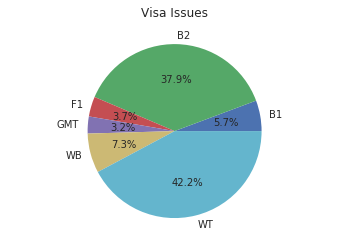

In [69]:
import matplotlib.pyplot as pyplot
visa_types=df.filter(df.visatype.isin('B1','B2','GMT','WB','WT','F1')).groupby(df.visatype).count()
visa_types_pd=visa_types.toPandas()
var=visa_types_pd.groupby(['visatype']).sum().stack()
temp=var.unstack()
#type(temp)
x_list = temp['count']
label_list = temp.index
#plt.axis("equal") #The pie chart is oval by default. To make it a circle use 
pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Visa Issues") 

## Gender wise visa issues

In [83]:
# get the Gender wise Count
gender_count_By_Month=df.groupby(df.gender).count()
#type(gender_count_By_Month)
#converted into Pandas Data frame
gender_count_By_Month_pd=gender_count_By_Month.toPandas()
#type(gender_count_By_Month_pd)

In [79]:
#verify the data
gender_count_By_Month_pd

,gender,count
0,F,18176125
1,None,4079983
2,M,18504505
3,U,18906
4,X,11010


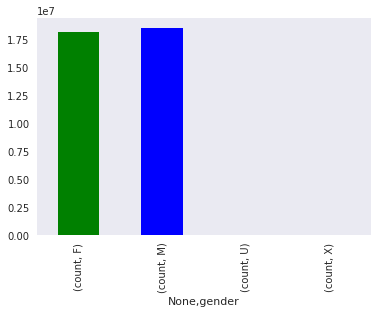

In [81]:
#Plotted the data
var = gender_count_By_Month_pd.groupby(['gender']).sum()
#type(var)
var.unstack().plot(kind='bar',stacked=True,  color=['green','blue','red','black'], grid=False)

## Visa Mode issues

In [91]:
# get the Gender wise Count
i94mode_count_By_Month=df.groupby(df.gender,df.i94mode).count()
#type(gender_count_By_Month)
#converted into Pandas Data frame
i94mode_count_By_Month_pd=i94mode_count_By_Month.toPandas()
#type(gender_count_By_Month_pd)
var = i94mode_count_By_Month_pd.groupby(['i94mode','gender']).sum()
var

count
i94mode gender          
0.0     F              1
        U              1
1.0     F       17412934
        M       17752916
        U           8108
        X           7128
2.0     F         203760
        M         181593
        U            917
        X            760
3.0     F         527084
        M         538318
        U           7867
        X            856
9.0     F          32346
        M          31678
        U           2013
        X           2266

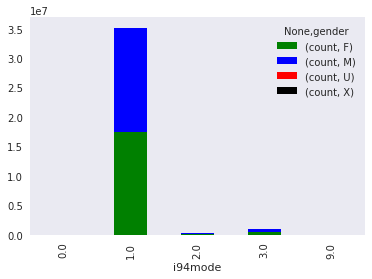

In [93]:
var.unstack().plot(kind='bar',stacked=True,  color=['green','blue','red','black'], grid=False)

In [95]:
var

count
i94mode gender          
0.0     F              1
        U              1
1.0     F       17412934
        M       17752916
        U           8108
        X           7128
2.0     F         203760
        M         181593
        U            917
        X            760
3.0     F         527084
        M         538318
        U           7867
        X            856
9.0     F          32346
        M          31678
        U           2013
        X           2266

In [110]:
i94mode_count_By_Month_pd

,gender,i94mode,count
0,U,3.0,7867
1,U,2.0,917
2,F,3.0,527084
3,None,NaN,73949
4,None,1.0,3985002
5,U,1.0,8108
6,F,2.0,203760
7,None,3.0,20876
8,X,1.0,7128
9,U,9.0,2013


Text(0.5,1,'Area from where People migrate to Canada')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

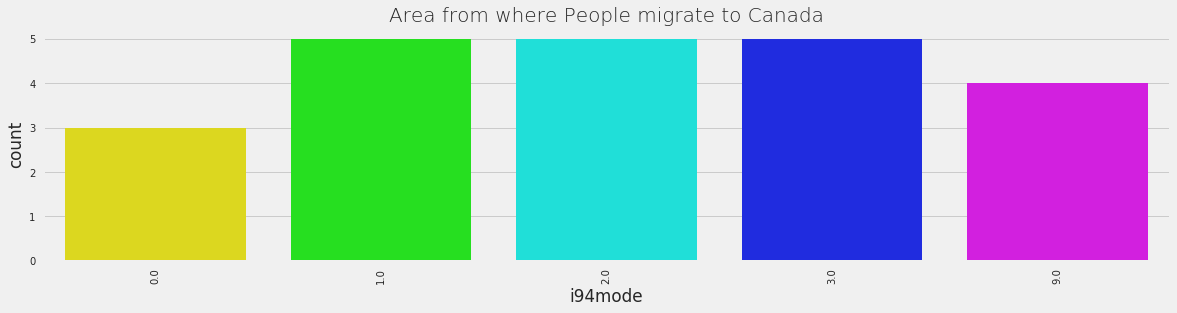

In [111]:
plt.rcParams['figure.figsize'] = (18, 4)
plt.style.use('fivethirtyeight')

sns.countplot(i94mode_count_By_Month_pd['i94mode'], palette = 'hsv')
plt.title('Area from where People migrate to Canada', fontsize = 20, fontweight = 100)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import datetime
s = "01232017"
#s_datetime = datetime.datetime.strptime(s, '%Y%m%d')
#s_datetime = datetime.datetime.strptime(s, '%m%d%Y')
print(s_datetime)